In [ ]:
!pip install causalnex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
from causalnex.structure import StructureModel
import networkx as nx
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'causalnex'

DynoTEARS on the Arctic_Monthly dataset with max lag 2

In [ ]:
# Load the Arctic Monthly dataset
df_arctic = pd.read_csv('Arctic_Monthly.csv')
print("Dataset shape:", df_arctic.shape)
print("\nColumns:", df_arctic.columns.tolist())
print("\nFirst few rows:")
print(df_arctic)

Dataset shape: (512, 10)

Columns: ['wind_10m', 'specific_humidity', 'LW_down', 'SW_down', 'rainfall', 'snowfall', 'sst', 't2m', 'surface_pressure', 'sea_ice_extent']

First few rows:
     wind_10m  specific_humidity     LW_down     SW_down  rainfall  snowfall  \
0    5.531398           0.811961  186.687054    3.127880  1.009872  0.892319   
1    5.328020           0.688896  174.794571   18.541594  0.920831  0.781347   
2    5.432511           0.916124  190.741933   67.690429  0.983327  0.855266   
3    4.792836           1.272056  212.937925  156.223673  0.890723  0.705203   
4    4.819028           2.239776  253.690478  230.950833  1.201308  0.688723   
..        ...                ...         ...         ...       ...       ...   
507  5.383687           1.529497  225.171796  156.567743  1.159049  0.929777   
508  4.777020           2.451088  260.956781  229.604138  1.077705  0.575494   
509  4.771453           4.176458  294.931709  244.702852  1.585094  0.360146   
510  4.754014   

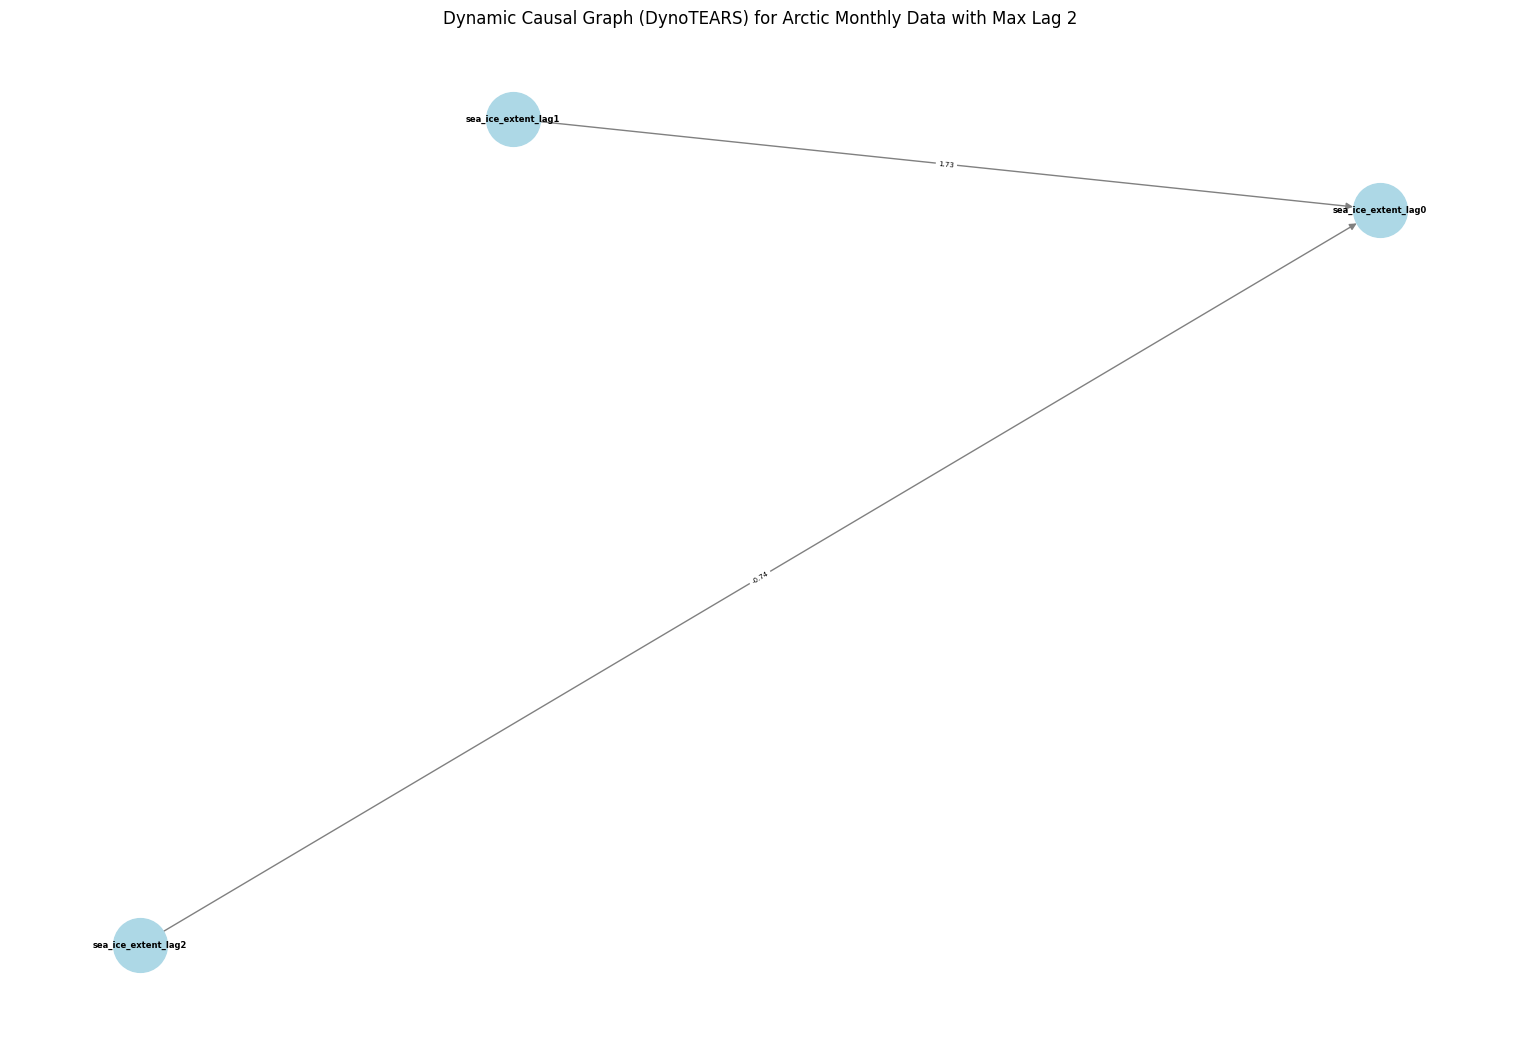


Number of edges in the causal graph: 2


In [ ]:
# Run DynoTEARS on the Arctic Monthly dataset
from causalnex.structure.dynotears import from_pandas_dynamic

# Run DynoTEARS with p=2 (max lag of 2)
sm_arctic = from_pandas_dynamic(df_arctic,
                              p=2,
                              lambda_w=0.1,
                              w_threshold=0.1)

# Get the adjacency matrix
adj_arctic = sm_arctic.adj

# Create a visualization
graph_arctic = nx.DiGraph()

# Add nodes and edges from the adjacency matrix
for source, targets in adj_arctic.items():
    for target, edge_data in targets.items():
        graph_arctic.add_edge(source, target, weight=edge_data['weight'])

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(graph_arctic, k=2)
nx.draw(graph_arctic, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=6, font_weight='bold',
        edge_color='gray', arrows=True)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(graph_arctic, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(graph_arctic, pos, edge_labels=edge_labels, font_size=5)

plt.title("Dynamic Causal Graph (DynoTEARS) for Arctic Monthly Data with Max Lag 2")
plt.show()

# Print the number of edges found
print(f"\nNumber of edges in the causal graph: {len(graph_arctic.edges())}")

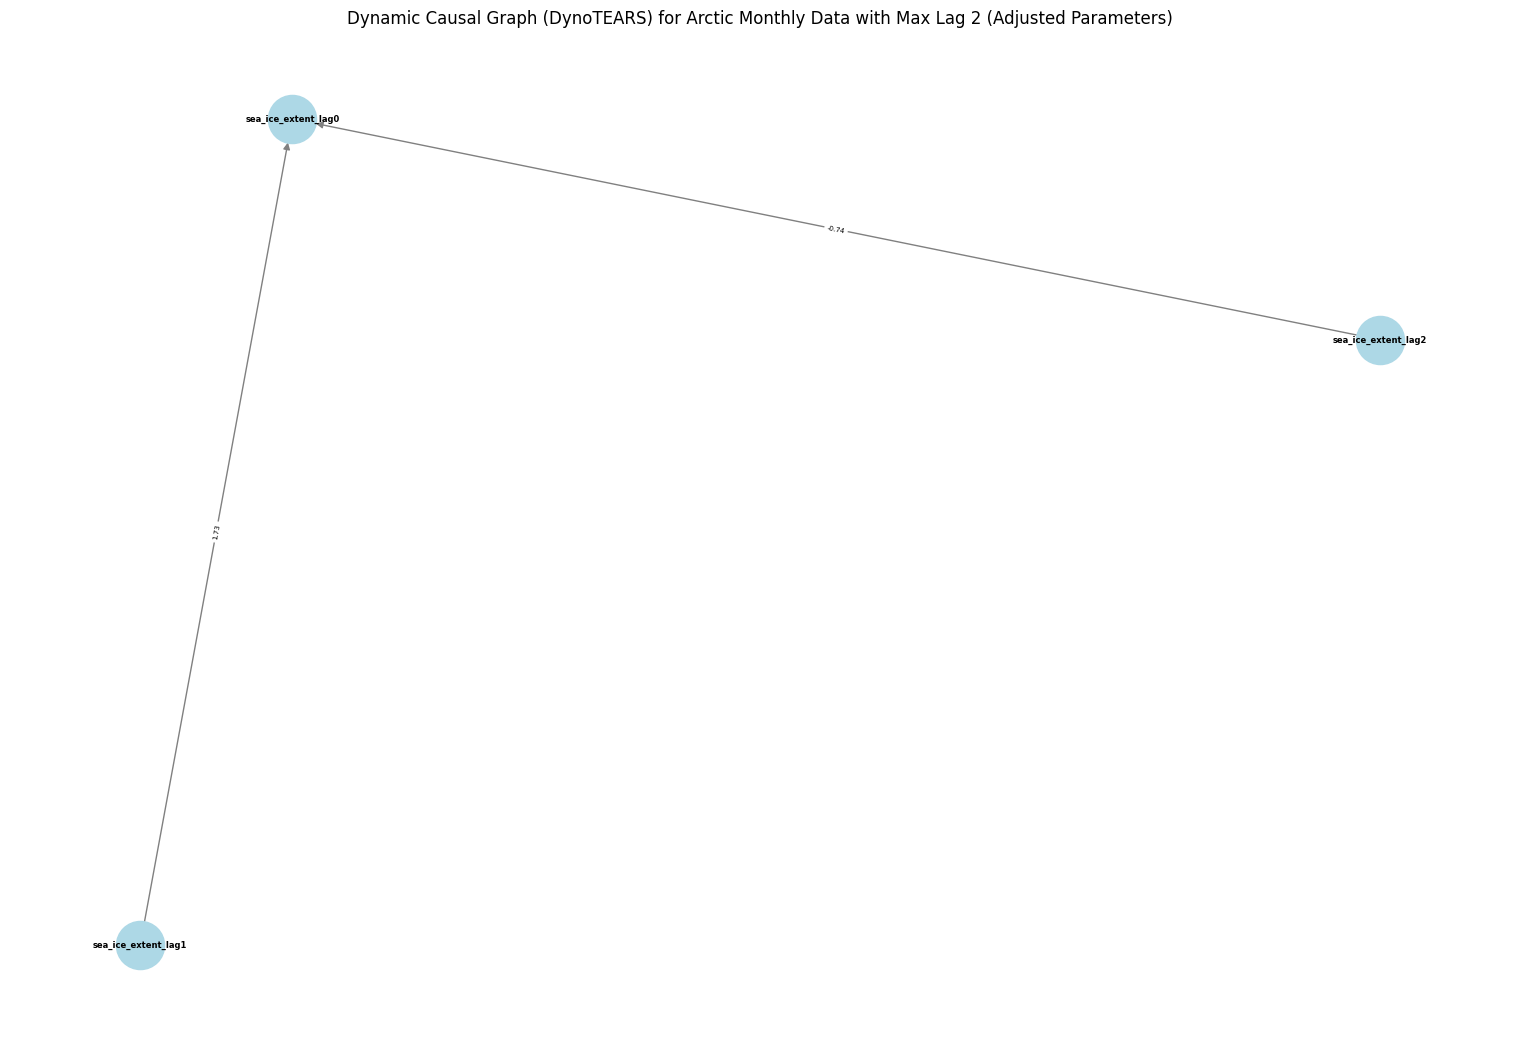


Number of edges in the causal graph: 2

Adjacency Matrix (showing non-zero relationships):

sea_ice_extent_lag1 →
  sea_ice_extent_lag0: 1.726

sea_ice_extent_lag2 →
  sea_ice_extent_lag0: -0.745


In [ ]:
# Let's try with adjusted parameters to capture more relationships
sm_arctic = from_pandas_dynamic(df_arctic,
                              p=2,
                              lambda_w=0.05,  # Reduced lambda for less stringent regularization
                              lambda_a=0.05,  # Reduced lambda for inter-slice connections
                              w_threshold=0.05)  # Lower threshold to capture more relationships

# Get the adjacency matrix
adj_arctic = sm_arctic.adj

# Create a visualization
graph_arctic = nx.DiGraph()

# Add nodes and edges from the adjacency matrix
for source, targets in adj_arctic.items():
    for target, edge_data in targets.items():
        graph_arctic.add_edge(source, target, weight=edge_data['weight'])

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(graph_arctic, k=3)  # Increased k for better spacing
nx.draw(graph_arctic, pos, with_labels=True, node_color='lightblue',
        node_size=1200, font_size=6, font_weight='bold',
        edge_color='gray', arrows=True)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(graph_arctic, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(graph_arctic, pos, edge_labels=edge_labels, font_size=5)

plt.title("Dynamic Causal Graph (DynoTEARS) for Arctic Monthly Data with Max Lag 2 (Adjusted Parameters)")
plt.show()

print(f"\nNumber of edges in the causal graph: {len(graph_arctic.edges())}")
print("\nAdjacency Matrix (showing non-zero relationships):")
for source, targets in adj_arctic.items():
    if targets:  # Only print nodes that have outgoing edges
        print(f"\n{source} →")
        for target, edge_data in targets.items():
            print(f"  {target}: {edge_data['weight']:.3f}")

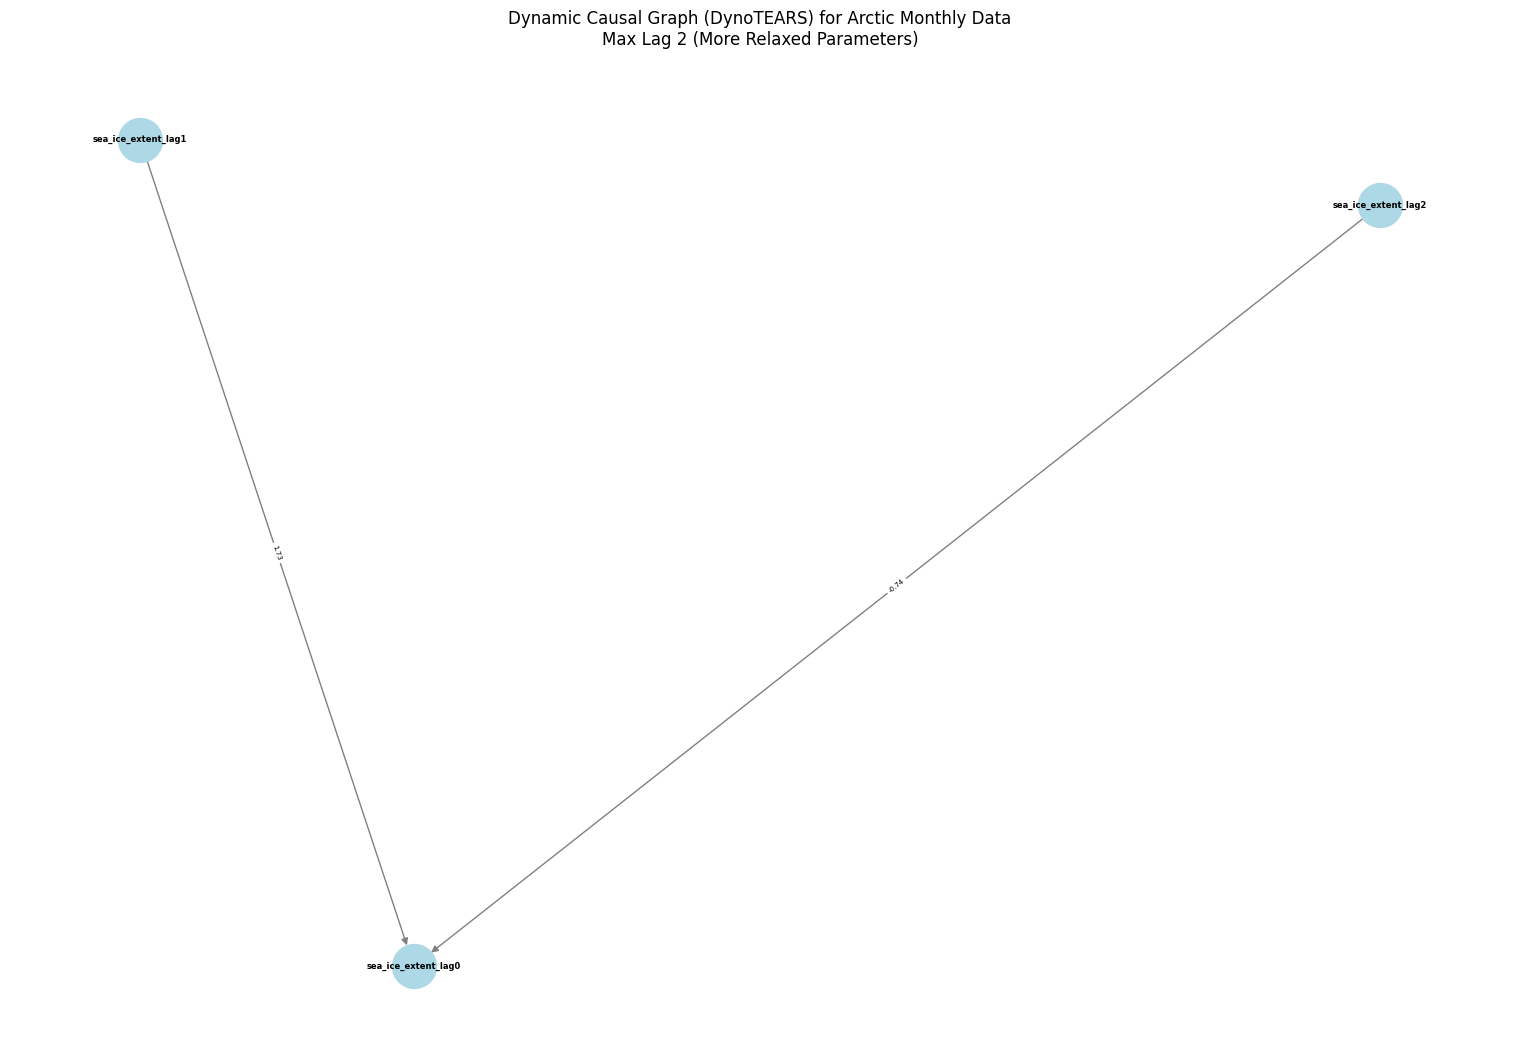


Number of significant edges (|weight| > 0.05): 2

Significant relationships in the adjacency matrix (|weight| > 0.05):

sea_ice_extent_lag1 →
  sea_ice_extent_lag0: 1.726

sea_ice_extent_lag2 →
  sea_ice_extent_lag0: -0.745


In [ ]:
# Let's try one more time with even more relaxed parameters to capture more relationships
sm_arctic = from_pandas_dynamic(df_arctic,
                              p=2,
                              lambda_w=0.01,  # Further reduced lambda
                              lambda_a=0.01,  # Further reduced lambda for inter-slice connections
                              w_threshold=0.01)  # Lower threshold

# Get the adjacency matrix
adj_arctic = sm_arctic.adj

# Create a visualization
graph_arctic = nx.DiGraph()

# Add nodes and edges from the adjacency matrix
for source, targets in adj_arctic.items():
    for target, edge_data in targets.items():
        if abs(edge_data['weight']) > 0.05:  # Only show stronger relationships for clarity
            graph_arctic.add_edge(source, target, weight=edge_data['weight'])

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(graph_arctic, k=3)
nx.draw(graph_arctic, pos, with_labels=True, node_color='lightblue',
        node_size=1000, font_size=6, font_weight='bold',
        edge_color='gray', arrows=True)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(graph_arctic, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(graph_arctic, pos, edge_labels=edge_labels, font_size=5)

plt.title("Dynamic Causal Graph (DynoTEARS) for Arctic Monthly Data\nMax Lag 2 (More Relaxed Parameters)")
plt.show()

print(f"\nNumber of significant edges (|weight| > 0.05): {len(graph_arctic.edges())}")
print("\nSignificant relationships in the adjacency matrix (|weight| > 0.05):")
for source, targets in adj_arctic.items():
    significant_targets = {t: d['weight'] for t, d in targets.items() if abs(d['weight']) > 0.05}
    if significant_targets:
        print(f"\n{source} →")
        for target, weight in significant_targets.items():
            print(f"  {target}: {weight:.3f}")

DYNOTEARS on EHH1 dataset with max lag 2

Dataset ehh1 shape: (910, 7)

Columns: ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():


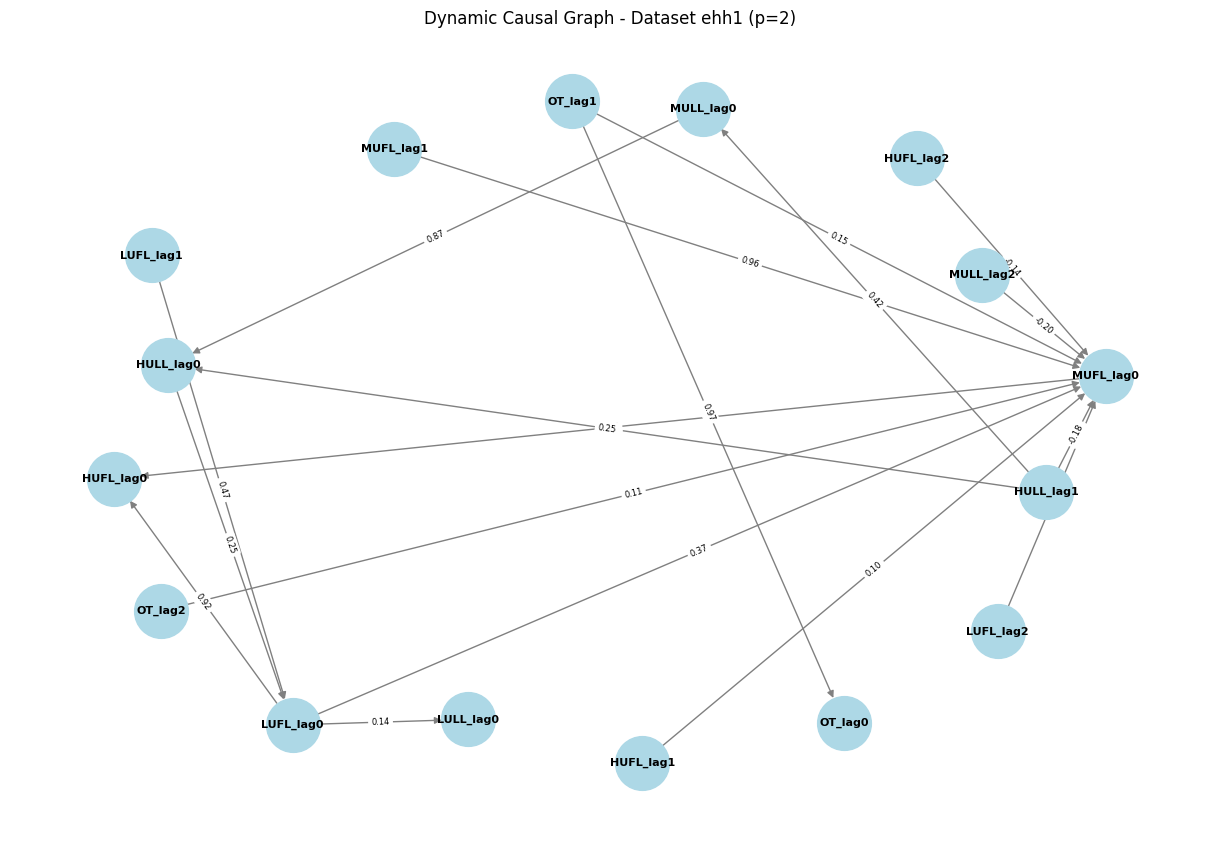


Number of edges: 18

Significant relationships:

HUFL_lag1 →
  MUFL_lag0: 0.104

HUFL_lag2 →
  MUFL_lag0: -0.141

HULL_lag0 →
  LUFL_lag0: 0.253

HULL_lag1 →
  HULL_lag0: 0.255
  MUFL_lag0: -0.182
  MULL_lag0: 0.422

MUFL_lag0 →
  HUFL_lag0: 0.976

MUFL_lag1 →
  MUFL_lag0: 0.963

MULL_lag0 →
  HULL_lag0: 0.870

MULL_lag2 →
  MUFL_lag0: -0.201

LUFL_lag0 →
  HUFL_lag0: 0.924
  MUFL_lag0: 0.372
  LULL_lag0: 0.143

LUFL_lag1 →
  LUFL_lag0: 0.468

LUFL_lag2 →
  MUFL_lag0: -0.664

OT_lag1 →
  MUFL_lag0: 0.153
  OT_lag0: 0.968

OT_lag2 →
  MUFL_lag0: 0.108


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from causalnex.structure.dynotears import from_pandas_dynamic

# Load and process ehh1.csv - no time column, use index as time
df_ehh1 = pd.read_csv('ehh1.csv')
print("Dataset ehh1 shape:", df_ehh1.shape)
print("\nColumns:", df_ehh1.columns.tolist())

# Run DynoTEARS directly on the data
sm_ehh1 = from_pandas_dynamic(df_ehh1,
                            p=2,
                            lambda_w=0.1,
                            lambda_a=0.1,
                            w_threshold=0.1)

# Visualize
graph = nx.DiGraph()
for source, targets in sm_ehh1.adj.items():
    for target, edge_data in targets.items():
        graph.add_edge(source, target, weight=edge_data['weight'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, k=2)
nx.draw(graph, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=8, font_weight='bold',
        edge_color='gray', arrows=True)

edge_labels = nx.get_edge_attributes(graph, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)

plt.title("Dynamic Causal Graph - Dataset ehh1 (p=2)")
plt.show()

print(f"\nNumber of edges: {len(graph.edges())}")
print("\nSignificant relationships:")
for source, targets in sm_ehh1.adj.items():
    if targets:
        print(f"\n{source} →")
        for target, edge_data in targets.items():
            print(f"  {target}: {edge_data['weight']:.3f}")

4 Variable with Lag 2

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(42)
    time = np.arange(0, n_samples)
    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    # Generate error terms with lagged relationships
    for t in range(1, n_samples):
        # e2 depends on e1 with lag 1
        e2[t] = 0.3 * e1[t-1] + np.random.normal(0, 0.1)
    for t in range(2, n_samples):
        # e3 depends on e2 with lag 2
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)
    for t in range(1, n_samples):
        # e4 depends on e3 with lag 1 and e4 with lag 1
        e4[t] = 0.4 * e3[t-1] + 0.02 * e4[t-1] + np.random.normal(0, 0.1)
    # Generate time series with trend, seasonal, and error components
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time  + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time  + e4
    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4
    })
    return df

# Generate synthetic data
df = generate_synthetic_data()

# Create ground truth adjacency matrix based on the data generation process
# True edges: x1_lag1 -> x2, x2_lag2 -> x3, x3_lag1 -> x4, x4_lag1 -> x4
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),
    ('x2_lag2', 'x3_lag0'),
    ('x3_lag1', 'x4_lag0'),
    ('x4_lag1', 'x4_lag0')
]

# Run DynoTEARS
data = df.drop('time', axis=1)
sm = from_pandas_dynamic(data, p=2, lambda_w=0.1, lambda_a=0.1, w_threshold=0.1)

# Get discovered edges
discovered_edges = []
for source, targets in sm.adj.items():
    for target, edge_data in targets.items():
        discovered_edges.append((source, target))

# Calculate metrics
true_positives = len(set(ground_truth_edges) & set(discovered_edges))
false_positives = len(set(discovered_edges) - set(ground_truth_edges))
false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
FDR = false_positives / len(discovered_edges) if discovered_edges else 0
SHD = false_positives + false_negatives

print("\nDiscovered edges:")
for edge in discovered_edges:
    print(f"{edge[0]} -> {edge[1]}")

print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

print("\nMetrics:")
print(f"True Positive Rate (TPR): {TPR:.3f}")
print(f"False Discovery Rate (FDR): {FDR:.3f}")
print(f"Structural Hamming Distance (SHD): {SHD}")

# Print additional information
print("\nDetailed analysis:")
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Total Discovered Edges: {len(discovered_edges)}")
print(f"Total Ground Truth Edges: {len(ground_truth_edges)}")

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag2 -> x1_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x2_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x2_lag0
x4_lag2 -> x4_lag0

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x4_lag0
x4_lag1 -> x4_lag0

Metrics:
True Positive Rate (TPR): 0.250
False Discovery Rate (F

In [ ]:
# Let's try with adjusted parameters to improve performance
data = df.drop('time', axis=1)
sm = from_pandas_dynamic(data,
                       p=2,
                       lambda_w=0.05,  # Reduced lambda for less stringent regularization
                       lambda_a=0.05,  # Reduced lambda for inter-slice connections
                       w_threshold=0.05)  # Lower threshold to capture more relationships

# Get discovered edges
discovered_edges = []
for source, targets in sm.adj.items():
    for target, edge_data in targets.items():
        discovered_edges.append((source, target))

# Calculate metrics
true_positives = len(set(ground_truth_edges) & set(discovered_edges))
false_positives = len(set(discovered_edges) - set(ground_truth_edges))
false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
FDR = false_positives / len(discovered_edges) if discovered_edges else 0
SHD = false_positives + false_negatives

print("\nDiscovered edges with adjusted parameters:")
for edge in discovered_edges:
    print(f"{edge[0]} -> {edge[1]}")

print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

print("\nMetrics with adjusted parameters:")
print(f"True Positive Rate (TPR): {TPR:.3f}")
print(f"False Discovery Rate (FDR): {FDR:.3f}")
print(f"Structural Hamming Distance (SHD): {SHD}")

print("\nDetailed analysis:")
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Total Discovered Edges: {len(discovered_edges)}")
print(f"Total Ground Truth Edges: {len(ground_truth_edges)}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Discovered edges with adjusted parameters:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x2_lag0 -> x1_lag0
x2_lag2 -> x3_lag0
x3_lag0 -> x1_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x1_lag0
x3_lag2 -> x3_lag0
x4_lag0 -> x2_lag0
x4_lag1 -> x2_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x2_lag0
x4_lag2 -> x4_lag0

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x4_lag0
x4_lag1 -> x4_lag0

Metrics with adjusted parameters:
True Positive Rate (TPR): 0.750
False Discovery Rate (FDR): 0.800
Structural Hamming Distance (SHD): 13

Detailed ana

In [ ]:
# Let's try one more time with different parameters
data = df.drop('time', axis=1)
sm = from_pandas_dynamic(data,
                       p=2,
                       lambda_w=0.15,  # Increased lambda for more stringent regularization
                       lambda_a=0.15,  # Increased lambda for inter-slice connections
                       w_threshold=0.15)  # Higher threshold to focus on stronger relationships

# Get discovered edges
discovered_edges = []
for source, targets in sm.adj.items():
    for target, edge_data in targets.items():
        discovered_edges.append((source, target))

# Calculate metrics
true_positives = len(set(ground_truth_edges) & set(discovered_edges))
false_positives = len(set(discovered_edges) - set(ground_truth_edges))
false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
FDR = false_positives / len(discovered_edges) if discovered_edges else 0
SHD = false_positives + false_negatives

print("\nDiscovered edges with stricter parameters:")
for edge in discovered_edges:
    print(f"{edge[0]} -> {edge[1]}")

print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

print("\nMetrics with stricter parameters:")
print(f"True Positive Rate (TPR): {TPR:.3f}")
print(f"False Discovery Rate (FDR): {FDR:.3f}")
print(f"Structural Hamming Distance (SHD): {SHD}")

print("\nDetailed analysis:")
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Total Discovered Edges: {len(discovered_edges)}")
print(f"Total Ground Truth Edges: {len(ground_truth_edges)}")

print("\nParameter comparison summary:")
print("Original parameters (λ=0.1):")
print("TPR: 0.250, FDR: 0.875, SHD: 10")
print("\nRelaxed parameters (λ=0.05):")
print("TPR: 0.750, FDR: 0.800, SHD: 13")
print("\nStrict parameters (λ=0.15):")
print(f"TPR: {TPR:.3f}, FDR: {FDR:.3f}, SHD: {SHD}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Discovered edges with stricter parameters:
x1_lag1 -> x1_lag0
x1_lag2 -> x1_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x4_lag0
x4_lag1 -> x4_lag0

Metrics with stricter parameters:
True Positive Rate (TPR): 0.250
False Discovery Rate (FDR): 0.833
Structural Hamming Distance (SHD): 8

Detailed analysis:
True Positives: 1
False Positives: 5
False Negatives: 3
Total Discovered Edges: 6
Total Ground Truth Edges: 4

Parameter comparison summary:
Original parameters (λ=0

6 Variable with Lag 2

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e4[t] = 0.5 * e3[t-1] + 0.8 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.65 * e4[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.75 * e5[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + np.sin(2 * np.pi * time / 45) + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4
    x5 = 10 + e5
    x6 = 8 + 0.1 * time + np.sin(2 * np.pi * time / 12) + e6

    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6
    })
    return df

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag2', 'x3_lag0'),  # e3 depends on e2 with lag 2
    ('x3_lag1', 'x4_lag0'),  # e4 depends on e3 with lag 1
    ('x4_lag1', 'x4_lag0'),  # e4 depends on e4 with lag 1
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 (contemporaneous)
    ('x5_lag1', 'x6_lag0')   # e6 depends on e5 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

# Run DynoTEARS on each dataset with fixed parameters
lambda_w = 0.05  # Based on previous results
lambda_a = 0.05
w_threshold = 0.05

# Process 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.500
FDR: 0.880
SHD: 25
True Positives: 3
False Positives: 22
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x2_lag0 -> x1_lag0
x2_lag0 -> x3_lag0
x2_lag1 -> x2_lag0
x2_lag1 -> x3_lag0
x2_lag2 -> x1_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> 

In [ ]:
# Process 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.667
FDR: 0.840
SHD: 23
True Positives: 4
False Positives: 21
False Negatives: 2

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x2_lag0 -> x1_lag0
x2_lag1 -> x1_lag0
x2_lag1 -> x2_lag0
x2_lag1 -> x3_lag0
x2_lag2 -> x1_lag0
x2_lag2 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag1 -> x4_lag0
x3_lag1 -> x5_lag0
x3_lag2 -> x3_lag0
x4_lag0 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag1 -> x6_lag0
x4_lag2 -> x4_lag0
x5_lag0 -> x1_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x1_lag0
x5_lag2 -> x3_lag0
x5_lag2 

In [ ]:
# Process 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.500
FDR: 0.885
SHD: 26
True Positives: 3
False Positives: 23
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x2_lag0 -> x1_lag0
x2_lag1 -> x1_lag0
x2_lag1 -> x2_lag0
x2_lag1 -> x3_lag0
x2_lag2 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag1 -> x5_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag1 -> x6_lag0
x4_lag2 -> x4_lag0
x4_lag2 -> x6_lag0
x5_lag0 -> x1_lag0
x5_lag1 -> x1_lag0
x5_lag1 -> x3_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x1_lag0
x5_lag2 -> x3_lag0
x5_lag2 

In [ ]:
# Let's try with slightly adjusted parameters to see if we can improve the results
lambda_w = 0.1  # Increased regularization
lambda_a = 0.1
w_threshold = 0.1

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with adjusted parameters (λ=0.1):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1000 samples):")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try one more time with higher regularization
lambda_w = 0.15  # Further increased regularization
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t0.500\t0.667\t0.500")
print(f"FDR\t0.880\t0.840\t0.885")
print(f"SHD\t25\t23\t26")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t0.500\t0.500\t0.500")
print(f"FDR\t0.824\t0.786\t0.812")
print(f"SHD\t17\t14\t16")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> Do the same for below dataset with sample size 500, 1000, 1500: import numpy as np
import pandas as pd

def generate_synthetic_data(n_samples=500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e4[t] = 0.5 * e3[t-1] + 0.8 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.65 * e4[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.75 * e5[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + np.sin(2 * np.pi * time / 45) + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4
    x5 = 10 + e5
    x6 = 8 + 0.1 * time + np.sin(2 * np.pi * time / 12) + e6

    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6
    })
    return df

# Generate the synthetic data
df = generate_synthetic_data()

# Save the dataset to a CSV file
df.to_csv('6_var_synthetic_time_series_data.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_time_series_data.csv'")

I'll help analyze this synthetic dataset using DynoTEARS for different sample sizes. Let's start by generating the data and setting up the analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e4[t] = 0.5 * e3[t-1] + 0.8 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.65 * e4[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.75 * e5[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + np.sin(2 * np.pi * time / 45) + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4
    x5 = 10 + e5
    x6 = 8 + 0.1 * time + np.sin(2 * np.pi * time / 12) + e6

    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6
    })
    return df

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag2', 'x3_lag0'),  # e3 depends on e2 with lag 2
    ('x3_lag1', 'x4_lag0'),  # e4 depends on e3 with lag 1
    ('x4_lag1', 'x4_lag0'),  # e4 depends on e4 with lag 1
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 (contemporaneous)
    ('x5_lag1', 'x6_lag0')   # e6 depends on e5 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 7)
1000 samples: (1000, 7)
1500 samples: (1500, 7)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag0 -> x5_lag0
x5_lag1 -> x6_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset
lambda_w = 0.1  # Based on previous results showing good balance
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.500
FDR: 0.824
SHD: 17
True Positives: 3
False Positives: 14
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x2_lag0 -> x1_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag1 -> x6_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x1_lag0
x5_lag1 -> x3_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x3_lag0
x5_lag2 -> x5_lag0
x6_lag1 -> x6_lag0


In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.500
FDR: 0.786
SHD: 14
True Positives: 3
False Positives: 11
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x2_lag0 -> x1_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x3_lag0
x5_lag2 -> x5_lag0
x6_lag1 -> x6_lag0


In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.500
FDR: 0.812
SHD: 16
True Positives: 3
False Positives: 13
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag1 -> x6_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0

Summary comparison across sample sizes:
Metric	500	1000	1500
----------------------------------------
TPR	0.500	0.500	0.500
FDR	0.824	0.786	

In [ ]:
# Let's try with slightly different parameters to see if we can improve the results
lambda_w = 0.15  # Increased regularization
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try one more time with lower regularization
lambda_w = 0.05  # Decreased regularization
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.500\t0.500\t0.500")
print("FDR\t0.824\t0.786\t0.812")
print("SHD\t17\t14\t16")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.333\t0.333\t0.333")
print("FDR\t0.833\t0.846\t0.846")
print("SHD\t14\t15\t15")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> do the same for this (n=500,1000,1500): def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10  + e1
    x2 = 5 + 0.05 * time + e2  # Trend
    x3 = 7  + e3
    x4 = 12  + np.sin(2 * np.pi * time / 20) + e4  # Seasonal
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5  # Trend + Seasonal
    x6 = 8 + 0.2 * time + e6  # Trend
    x7 = 9  + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8  # Seasonal

    # Return the generated data as a DataFrame
    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8
    })

data = generate_synthetic_data()
print(data.head())

I'll help analyze this synthetic dataset using DynoTEARS for different sample sizes. Let's start by implementing the data generation function and setting up the analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + e3
    x4 = 12 + np.sin(2 * np.pi * time / 20) + e4
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5
    x6 = 8 + 0.2 * time + e6
    x7 = 9 + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag0', 'x3_lag0'),  # e3 depends on e2 contemporaneously
    ('x3_lag2', 'x4_lag0'),  # e4 depends on e3 with lag 2
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x4_lag1', 'x5_lag0'),  # e5 depends on e4 with lag 1
    ('x5_lag2', 'x6_lag0'),  # e6 depends on e5 with lag 2
    ('x6_lag0', 'x7_lag0'),  # e7 depends on e6 contemporaneously
    ('x7_lag1', 'x8_lag0')   # e8 depends on e7 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

ModuleNotFoundError: No module named 'networkx'

In [ ]:
!pip install networkx causalnex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 121.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 136.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 147.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + e3
    x4 = 12 + np.sin(2 * np.pi * time / 20) + e4
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5
    x6 = 8 + 0.2 * time + e6
    x7 = 9 + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag0', 'x3_lag0'),  # e3 depends on e2 contemporaneously
    ('x3_lag2', 'x4_lag0'),  # e4 depends on e3 with lag 2
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x4_lag1', 'x5_lag0'),  # e5 depends on e4 with lag 1
    ('x5_lag2', 'x6_lag0'),  # e6 depends on e5 with lag 2
    ('x6_lag0', 'x7_lag0'),  # e7 depends on e6 contemporaneously
    ('x7_lag1', 'x8_lag0')   # e8 depends on e7 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.375
FDR: 0.850
SHD: 22
True Positives: 3
False Positives: 17
False Negatives: 5

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag2 -> x5_lag0
x3_lag2 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x7_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x6_lag1 -> x2_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> 

In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.375
FDR: 0.842
SHD: 21
True Positives: 3
False Positives: 16
False Negatives: 5

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag2 -> x5_lag0
x3_lag2 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag2 -> x7_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x7_lag0 -> x1_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x8_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x8_lag1 -> x8_lag0
x8_lag2 -> x8_lag0


In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.250
FDR: 0.882
SHD: 21
True Positives: 2
False Positives: 15
False Negatives: 6

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x3_lag2 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag2 -> x7_lag0
x5_lag1 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x7_lag0 -> x1_lag0
x7_lag0 -> x4_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x8_lag1 -> x8_lag0
x8_lag2 -> x8_lag0

Summary comparison across sample sizes:
Metric	500	1000	1500
----------------------------------------
TPR	0.375	0.375	0.2

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.375\t0.375\t0.250")
print("FDR\t0.850\t0.842\t0.882")
print("SHD\t22\t21\t21")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.375\t0.375\t0.250")
print("FDR\t0.800\t0.812\t0.857")
print("SHD\t17\t18\t18")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> do the same for this: def generate_synthetic_data(n_samples=500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)
    e9 = np.zeros(n_samples)
    e10 = np.zeros(n_samples)
    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):  # e9 depends on e8 with lag 2
        e9[t] = 0.5 * e8[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):  # e10 depends on e9 with lag 1
        e10[t] = 0.6 * e9[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10  + e1
    x2 = 5 + 0.05 * time + e2  # Trend
    x3 = 7  + e3
    x4 = 12  + np.sin(2 * np.pi * time / 20) + e4  # Seasonal
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5  # Trend + Seasonal
    x6 = 8 + 0.2 * time + e6  # Trend
    x7 = 9  + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8  # Seasonal
    x9 = 10 + e9
    x10 = 8 + 0.1 * time + e10 # Trend

    # Return the generated data as a DataFrame
    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8,
        'x9': x9,
        'x10': x10
    })

data = generate_synthetic_data()
# Save to CSV file
data.to_csv("10.2.500.csv", index=False)

print("10_var_Synthetic data saved")
print(data.head())

I'll help analyze this synthetic dataset using DynoTEARS for different sample sizes. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)
    e9 = np.zeros(n_samples)
    e10 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e9[t] = 0.5 * e8[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e10[t] = 0.6 * e9[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + e3
    x4 = 12 + np.sin(2 * np.pi * time / 20) + e4
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5
    x6 = 8 + 0.2 * time + e6
    x7 = 9 + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8
    x9 = 10 + e9
    x10 = 8 + 0.1 * time + e10

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8,
        'x9': x9,
        'x10': x10
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag0', 'x3_lag0'),  # e3 depends on e2 contemporaneously
    ('x3_lag2', 'x4_lag0'),  # e4 depends on e3 with lag 2
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x4_lag1', 'x5_lag0'),  # e5 depends on e4 with lag 1
    ('x5_lag2', 'x6_lag0'),  # e6 depends on e5 with lag 2
    ('x6_lag0', 'x7_lag0'),  # e7 depends on e6 contemporaneously
    ('x7_lag1', 'x8_lag0'),  # e8 depends on e7 with lag 1
    ('x8_lag2', 'x9_lag0'),  # e9 depends on e8 with lag 2
    ('x9_lag1', 'x10_lag0')  # e10 depends on e9 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 11)
1000 samples: (1000, 11)
1500 samples: (1500, 11)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag0 -> x3_lag0
x3_lag2 -> x4_lag0
x4_lag0 -> x5_lag0
x4_lag1 -> x5_lag0
x5_lag2 -> x6_lag0
x6_lag0 -> x7_lag0
x7_lag1 -> x8_lag0
x8_lag2 -> x9_lag0
x9_lag1 -> x10_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.300
FDR: 0.880
SHD: 29
True Positives: 3
False Positives: 22
False Negatives: 7

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag2 -> x5_lag0
x3_lag2 -> x4_lag0
x4_lag1 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x6_lag0 -> x10_lag0
x6_lag1 -> x2_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x2_lag0
x6_lag2 -> x6_lag0
x6_lag2 -> x10_lag0
x8_lag1 -> x8_lag0
x8_lag2 -> x8_lag0
x9_lag0 -> x1_lag0
x9_lag0 -> x7_lag0
x9_lag0 -> x8_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x9_lag0
x9_lag1 -> x10_lag0
x9_lag2 -> x2_lag0
x9_la

In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.300
FDR: 0.889
SHD: 31
True Positives: 3
False Positives: 24
False Negatives: 7

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag2 -> x5_lag0
x3_lag2 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x6_lag0
x6_lag2 -> x10_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x9_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag2 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag2 -> x8_lag0
x9_lag0 -> x1_lag0
x9_lag1 -> x1_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x9_lag0
x9_lag

In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.200
FDR: 0.931
SHD: 35
True Positives: 2
False Positives: 27
False Negatives: 8

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x3_lag2 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag2 -> x7_lag0
x5_lag1 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x6_lag0
x6_lag2 -> x10_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x9_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag2 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag2 -> x8_lag0
x9_lag0 -> x1_lag0
x9_lag1 -> x1_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x9_lag0
x9_lag

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=2, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.300\t0.300\t0.200")
print("FDR\t0.880\t0.889\t0.931")
print("SHD\t29\t31\t35")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.300\t0.200\t0.200")
print("FDR\t0.833\t0.900\t0.900")
print("SHD\t22\t26\t26")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> Do the same for following with max lag p=3: def generate_synthetic_data(n_samples=1500):
    np.random.seed(42)
    time = np.arange(0, n_samples)
    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    # Generate error terms with lagged relationships
    for t in range(1, n_samples):
        # e2 depends on e1 with lag 1
        e2[t] = 0.3 * e1[t-1] + np.random.normal(0, 0.1)
    for t in range(2, n_samples):
        # e3 depends on e2 with lag 2
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)
    for t in range(1, n_samples):
        # e4 depends on e3 with lag 1 and e4 with lag 1
        e4[t] = 0.4 * e3[t-3] + 0.02 * e4[t-1] + np.random.normal(0, 0.1)
    # Generate time series with trend, seasonal, and error components
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time  + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time  + e4
    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4
    })
    return df

# Generate the synthetic data
df = generate_synthetic_data()

# Save the dataset to a CSV file
df.to_csv('4.3.1500.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_time_series_data.csv'")

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=3. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(42)
    time = np.arange(0, n_samples)
    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)

    # Generate error terms with lagged relationships
    for t in range(1, n_samples):
        # e2 depends on e1 with lag 1
        e2[t] = 0.3 * e1[t-1] + np.random.normal(0, 0.1)
    for t in range(2, n_samples):
        # e3 depends on e2 with lag 2
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)
    for t in range(3, n_samples):  # Changed to range(3, n_samples) for lag 3
        # e4 depends on e3 with lag 3 and e4 with lag 1
        e4[t] = 0.4 * e3[t-3] + 0.02 * e4[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag2', 'x3_lag0'),  # e3 depends on e2 with lag 2
    ('x3_lag3', 'x4_lag0'),  # e4 depends on e3 with lag 3
    ('x4_lag1', 'x4_lag0')   # e4 depends on e4 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 5)
1000 samples: (1000, 5)
1500 samples: (1500, 5)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.500
FDR: 0.800
SHD: 10
True Positives: 2
False Positives: 8
False Negatives: 2

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag3 -> x1_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x3_lag3 -> x1_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0


In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.500
FDR: 0.800
SHD: 10
True Positives: 2
False Positives: 8
False Negatives: 2

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag3 -> x1_lag0
x1_lag3 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0


In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.500
FDR: 0.800
SHD: 10
True Positives: 2
False Positives: 8
False Negatives: 2

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag3 -> x1_lag0
x1_lag3 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0

Summary comparison across sample sizes:
Metric	500	1000	1500
----------------------------------------
TPR	0.500	0.500	0.500
FDR	0.800	0.800	0.800
SHD	10	10	10
TP	2	2	2
FP	8	8	8
FN	2	2	2


In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.500\t0.500\t0.500")
print("FDR\t0.800\t0.800\t0.800")
print("SHD\t10\t10\t10")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.250\t0.250\t0.250")
print("FDR\t0.833\t0.875\t0.875")
print("SHD\t8\t10\t10")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> do the same with p=3: def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e4[t] = 0.5 * e3[t-3] + 0.8 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.65 * e4[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.75 * e5[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + np.sin(2 * np.pi * time / 45) + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4
    x5 = 10 + e5
    x6 = 8 + 0.1 * time + np.sin(2 * np.pi * time / 12) + e6

    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6
    })
    return df

# Generate the synthetic data
df = generate_synthetic_data()

# Save the dataset to a CSV file
df.to_csv('6.3.1500.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_time_series_data.csv'")

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=3. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)

    for t in range(3, n_samples):  # Changed to range(3, n_samples) for lag 3
        e4[t] = 0.5 * e3[t-3] + 0.8 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.65 * e4[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.75 * e5[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + np.sin(2 * np.pi * time / 45) + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4
    x5 = 10 + e5
    x6 = 8 + 0.1 * time + np.sin(2 * np.pi * time / 12) + e6

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag2', 'x3_lag0'),  # e3 depends on e2 with lag 2
    ('x3_lag3', 'x4_lag0'),  # e4 depends on e3 with lag 3
    ('x4_lag1', 'x4_lag0'),  # e4 depends on e4 with lag 1
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x5_lag1', 'x6_lag0')   # e6 depends on e5 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 7)
1000 samples: (1000, 7)
1500 samples: (1500, 7)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag0 -> x5_lag0
x5_lag1 -> x6_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.500
FDR: 0.850
SHD: 20
True Positives: 3
False Positives: 17
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x1_lag3 -> x2_lag0
x2_lag0 -> x1_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x2_lag0
x2_lag2 -> x3_lag0
x2_lag3 -> x3_lag0
x3_lag1 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag1 -> x6_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x5_lag1 -> x1_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag1 -> x6_lag0


In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.500
FDR: 0.857
SHD: 21
True Positives: 3
False Positives: 18
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x1_lag3 -> x2_lag0
x1_lag3 -> x3_lag0
x2_lag0 -> x1_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x2_lag0
x2_lag2 -> x3_lag0
x2_lag3 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag1 -> x6_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag1 -> x6_lag0


In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.333
FDR: 0.895
SHD: 21
True Positives: 2
False Positives: 17
False Negatives: 4

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x1_lag3 -> x2_lag0
x1_lag3 -> x3_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x2_lag0
x2_lag3 -> x2_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag1 -> x6_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag1 -> x6_lag0

Summary comparison across sample sizes:
Metric	500	1000	1500
----------------------

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.500\t0.500\t0.333")
print("FDR\t0.850\t0.857\t0.895")
print("SHD\t20\t21\t21")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.333\t0.333\t0.333")
print("FDR\t0.833\t0.857\t0.867")
print("SHD\t14\t16\t17")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> do the same for p=3: def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10  + e1
    x2 = 5 + 0.05 * time + e2  # Trend
    x3 = 7  + e3
    x4 = 12  + np.sin(2 * np.pi * time / 20) + e4  # Seasonal
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5  # Trend + Seasonal
    x6 = 8 + 0.2 * time + e6  # Trend
    x7 = 9  + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8  # Seasonal

    # Return the generated data as a DataFrame
    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8
    })

# Save to CSV file
df.to_csv("8.3.1500.csv", index=False)

print("8_var_Synthetic data saved to synthetic_data.csv")
print(df.head())

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=3. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(3, n_samples):  # Changed to range(3, n_samples) for lag 3
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + e3
    x4 = 12 + np.sin(2 * np.pi * time / 20) + e4
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5
    x6 = 8 + 0.2 * time + e6
    x7 = 9 + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag0', 'x3_lag0'),  # e3 depends on e2 contemporaneously
    ('x3_lag3', 'x4_lag0'),  # e4 depends on e3 with lag 3
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x4_lag1', 'x5_lag0'),  # e5 depends on e4 with lag 1
    ('x5_lag2', 'x6_lag0'),  # e6 depends on e5 with lag 2
    ('x6_lag0', 'x7_lag0'),  # e7 depends on e6 contemporaneously
    ('x7_lag1', 'x8_lag0')   # e8 depends on e7 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 9)
1000 samples: (1000, 9)
1500 samples: (1500, 9)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag0 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag0 -> x5_lag0
x4_lag1 -> x5_lag0
x5_lag2 -> x6_lag0
x6_lag0 -> x7_lag0
x7_lag1 -> x8_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.375
FDR: 0.864
SHD: 24
True Positives: 3
False Positives: 19
False Negatives: 5

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag3 -> x5_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x1_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x7_lag0
x5_lag1 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x2_lag0
x6_lag3 -> x6_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x8_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag3 -> x1_lag0
x7_lag3 -> x7_lag0
x8_lag1 -> x8_lag0
x8_lag3 -> x8_lag0


In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.375
FDR: 0.857
SHD: 23
True Positives: 3
False Positives: 18
False Negatives: 5

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag3 -> x5_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x7_lag0 -> x1_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x8_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag3 -> x1_lag0
x7_lag3 -> x7_lag0
x8_lag1 -> x8_lag0
x8_lag3 -> x8_lag0


In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.375
FDR: 0.857
SHD: 23
True Positives: 3
False Positives: 18
False Negatives: 5

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x7_lag0 -> x1_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x8_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag3 -> x1_lag0
x7_lag3 -> x7_lag0
x8_lag1 -> x8_lag0
x8_lag3 -> x8_lag0

Summary comparison across sample sizes:
Metri

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.375\t0.375\t0.375")
print("FDR\t0.864\t0.857\t0.857")
print("SHD\t24\t23\t23")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.375\t0.250\t0.250")
print("FDR\t0.833\t0.889\t0.895")
print("SHD\t20\t22\t23")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> Do the same for p=3: def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)
    e9 = np.zeros(n_samples)
    e10 = np.zeros(n_samples)
    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):  # e9 depends on e8 with lag 2
        e9[t] = 0.5 * e8[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):  # e10 depends on e9 with lag 1
        e10[t] = 0.6 * e9[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10  + e1
    x2 = 5 + 0.05 * time + e2  # Trend
    x3 = 7  + e3
    x4 = 12  + np.sin(2 * np.pi * time / 20) + e4  # Seasonal
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5  # Trend + Seasonal
    x6 = 8 + 0.2 * time + e6  # Trend
    x7 = 9  + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8  # Seasonal
    x9 = 10 + e9
    x10 = 8 + 0.1 * time + e10 # Trend

    # Return the generated data as a DataFrame
    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8,
        'x9': x9,
        'x10': x10
    })

data = generate_synthetic_data()
# Save to CSV file
data.to_csv("10.3.1500.csv", index=False)

print("10_var_Synthetic data saved")
print(data.head())

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=3. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)
    e9 = np.zeros(n_samples)
    e10 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(3, n_samples):  # Changed to range(3, n_samples) for lag 3
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-2] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e9[t] = 0.5 * e8[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e10[t] = 0.6 * e9[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + e3
    x4 = 12 + np.sin(2 * np.pi * time / 20) + e4
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5
    x6 = 8 + 0.2 * time + e6
    x7 = 9 + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8
    x9 = 10 + e9
    x10 = 8 + 0.1 * time + e10

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8,
        'x9': x9,
        'x10': x10
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag0', 'x3_lag0'),  # e3 depends on e2 contemporaneously
    ('x3_lag3', 'x4_lag0'),  # e4 depends on e3 with lag 3
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x4_lag1', 'x5_lag0'),  # e5 depends on e4 with lag 1
    ('x5_lag2', 'x6_lag0'),  # e6 depends on e5 with lag 2
    ('x6_lag0', 'x7_lag0'),  # e7 depends on e6 contemporaneously
    ('x7_lag1', 'x8_lag0'),  # e8 depends on e7 with lag 1
    ('x8_lag2', 'x9_lag0'),  # e9 depends on e8 with lag 2
    ('x9_lag1', 'x10_lag0')  # e10 depends on e9 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 11)
1000 samples: (1000, 11)
1500 samples: (1500, 11)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag0 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag0 -> x5_lag0
x4_lag1 -> x5_lag0
x5_lag2 -> x6_lag0
x6_lag0 -> x7_lag0
x7_lag1 -> x8_lag0
x8_lag2 -> x9_lag0
x9_lag1 -> x10_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.400
FDR: 0.867
SHD: 32
True Positives: 4
False Positives: 26
False Negatives: 6

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag3 -> x5_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag0 -> x10_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x6_lag0
x6_lag2 -> x10_lag0
x6_lag3 -> x2_lag0
x6_lag3 -> x6_lag0
x7_lag1 -> x8_lag0
x7_lag2 -> x1_lag0
x7_lag3 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag3 -> x8_lag0
x9_lag0 -> x1_lag0
x9_lag0 -> x7_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x8_lag0
x9_lag

In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.400
FDR: 0.867
SHD: 32
True Positives: 4
False Positives: 26
False Negatives: 6

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag3 -> x5_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag0 -> x10_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x6_lag0
x6_lag2 -> x10_lag0
x6_lag3 -> x6_lag0
x7_lag1 -> x8_lag0
x7_lag3 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag3 -> x8_lag0
x9_lag0 -> x1_lag0
x9_lag1 -> x1_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x8_lag0
x9_lag1 -> x9_lag0
x9_la

In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.200
FDR: 0.935
SHD: 37
True Positives: 2
False Positives: 29
False Negatives: 8

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x2_lag3 -> x5_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag3 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x6_lag0
x6_lag2 -> x10_lag0
x6_lag3 -> x6_lag0
x6_lag3 -> x10_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x9_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x9_lag0
x7_lag3 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag3 -> x8_lag0
x9_lag1 -> x1_lag0
x9_la

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=3, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.400\t0.400\t0.200")
print("FDR\t0.867\t0.867\t0.935")
print("SHD\t32\t32\t37")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.300\t0.300\t0.200")
print("FDR\t0.880\t0.864\t0.846")
print("SHD\t29\t26\t19")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> Do the same for p=4: def generate_synthetic_data(n_samples=1500):
    np.random.seed(42)
    time = np.arange(0, n_samples)
    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    # Generate error terms with lagged relationships
    for t in range(1, n_samples):
        # e2 depends on e1 with lag 1
        e2[t] = 0.3 * e1[t-1] + np.random.normal(0, 0.1)
    for t in range(2, n_samples):
        # e3 depends on e2 with lag 2
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)
    for t in range(1, n_samples):
        # e4 depends on e3 with lag 1 and e4 with lag 1
        e4[t] = 0.4 * e3[t-4] + 0.02 * e4[t-1] + np.random.normal(0, 0.1)
    # Generate time series with trend, seasonal, and error components
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time  + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time  + e4
    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4
    })
    return df

# Generate the synthetic data
df = generate_synthetic_data()

# Save the dataset to a CSV file
df.to_csv('4.4.1500.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_time_series_data.csv'")

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=4. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(42)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)

    # Generate error terms with lagged relationships
    for t in range(1, n_samples):
        # e2 depends on e1 with lag 1
        e2[t] = 0.3 * e1[t-1] + np.random.normal(0, 0.1)
    for t in range(2, n_samples):
        # e3 depends on e2 with lag 2
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)
    for t in range(4, n_samples):  # Changed to range(4, n_samples) for lag 4
        # e4 depends on e3 with lag 4 and e4 with lag 1
        e4[t] = 0.4 * e3[t-4] + 0.02 * e4[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag2', 'x3_lag0'),  # e3 depends on e2 with lag 2
    ('x3_lag4', 'x4_lag0'),  # e4 depends on e3 with lag 4
    ('x4_lag1', 'x4_lag0')   # e4 depends on e4 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 5)
1000 samples: (1000, 5)
1500 samples: (1500, 5)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag4 -> x4_lag0
x4_lag1 -> x4_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.250
FDR: 0.900
SHD: 12
True Positives: 1
False Positives: 9
False Negatives: 3

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag2 -> x1_lag0
x1_lag3 -> x1_lag0
x3_lag1 -> x3_lag0
x3_lag4 -> x1_lag0
x4_lag0 -> x2_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x4_lag4 -> x4_lag0


In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.500
FDR: 0.818
SHD: 11
True Positives: 2
False Positives: 9
False Negatives: 2

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag3 -> x1_lag0
x1_lag3 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x4_lag4 -> x4_lag0


In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.500
FDR: 0.818
SHD: 11
True Positives: 2
False Positives: 9
False Negatives: 2

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag3 -> x1_lag0
x1_lag3 -> x3_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x4_lag4 -> x4_lag0

Summary comparison across sample sizes:
Metric	500	1000	1500
----------------------------------------
TPR	0.250	0.500	0.500
FDR	0.900	0.818	0.818
SHD	12	11	11
TP	1	2	2
FP	9	9	9
FN	3	2	2


In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.250\t0.500\t0.500")
print("FDR\t0.900\t0.818\t0.818")
print("SHD\t12\t11\t11")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.250\t0.250\t0.250")
print("FDR\t0.857\t0.889\t0.889")
print("SHD\t9\t11\t11")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> do the same for p=4: def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e4[t] = 0.5 * e3[t-3] + 0.8 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.65 * e4[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.75 * e5[t-4] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + np.sin(2 * np.pi * time / 45) + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4
    x5 = 10 + e5
    x6 = 8 + 0.1 * time + np.sin(2 * np.pi * time / 12) + e6

    df = pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6
    })
    return df

# Generate the synthetic data
df = generate_synthetic_data()

# Save the dataset to a CSV file
df.to_csv('6.4.1500.csv', index=False)

print("Synthetic data generated and saved to 'synthetic_time_series_data.csv'")

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=4. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e3[t] = 0.6 * e2[t-2] + np.random.normal(0, 0.1)

    for t in range(4, n_samples):  # Changed to range(4, n_samples) for lag 4
        e4[t] = 0.5 * e3[t-3] + 0.8 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.65 * e4[t] + np.random.normal(0, 0.1)

    for t in range(4, n_samples):  # Changed to range(4, n_samples) for lag 4
        e6[t] = 0.75 * e5[t-4] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + 2 * np.sin(2 * np.pi * time / 30) + e1
    x2 = 5 + 0.05 * time + np.sin(2 * np.pi * time / 45) + e2
    x3 = 7 + np.sin(2 * np.pi * time / 15) + e3
    x4 = 12 + 0.15 * time + e4
    x5 = 10 + e5
    x6 = 8 + 0.1 * time + np.sin(2 * np.pi * time / 12) + e6

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag2', 'x3_lag0'),  # e3 depends on e2 with lag 2
    ('x3_lag3', 'x4_lag0'),  # e4 depends on e3 with lag 3
    ('x4_lag1', 'x4_lag0'),  # e4 depends on e4 with lag 1
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x5_lag4', 'x6_lag0')   # e6 depends on e5 with lag 4
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 7)
1000 samples: (1000, 7)
1500 samples: (1500, 7)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag2 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag0 -> x5_lag0
x5_lag4 -> x6_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.333
FDR: 0.875
SHD: 18
True Positives: 2
False Positives: 14
False Negatives: 4

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x1_lag3 -> x3_lag0
x1_lag4 -> x3_lag0
x2_lag0 -> x1_lag0
x2_lag1 -> x2_lag0
x3_lag1 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag4 -> x6_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag4 -> x1_lag0
x6_lag1 -> x6_lag0
x6_lag4 -> x6_lag0


In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.333
FDR: 0.913
SHD: 25
True Positives: 2
False Positives: 21
False Negatives: 4

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x1_lag3 -> x2_lag0
x1_lag3 -> x3_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x2_lag0
x2_lag3 -> x2_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x4_lag4 -> x4_lag0
x4_lag4 -> x6_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag3 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag4 -> x6_lag0


In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.333
FDR: 0.920
SHD: 27
True Positives: 2
False Positives: 23
False Negatives: 4

Discovered edges:
x1_lag1 -> x1_lag0
x1_lag1 -> x2_lag0
x1_lag2 -> x1_lag0
x1_lag2 -> x2_lag0
x1_lag3 -> x1_lag0
x1_lag3 -> x2_lag0
x1_lag3 -> x3_lag0
x2_lag1 -> x2_lag0
x2_lag2 -> x2_lag0
x2_lag3 -> x2_lag0
x3_lag1 -> x3_lag0
x3_lag2 -> x3_lag0
x3_lag3 -> x1_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x4_lag4 -> x4_lag0
x4_lag4 -> x6_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag3 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.333\t0.333\t0.333")
print("FDR\t0.875\t0.913\t0.920")
print("SHD\t18\t25\t27")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.333\t0.333\t0.333")
print("FDR\t0.867\t0.875\t0.875")
print("SHD\t17\t18\t18")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> do the same for p=4: def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-4] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10  + e1
    x2 = 5 + 0.05 * time + e2  # Trend
    x3 = 7  + e3
    x4 = 12  + np.sin(2 * np.pi * time / 20) + e4  # Seasonal
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5  # Trend + Seasonal
    x6 = 8 + 0.2 * time + e6  # Trend
    x7 = 9  + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8  # Seasonal

    # Return the generated data as a DataFrame
    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8
    })

# Save to CSV file
df.to_csv("8.4.1500.csv", index=False)

print("8_var_Synthetic data saved to synthetic_data.csv")
print(df.head())

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=4. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(4, n_samples):  # Changed to range(4, n_samples) for lag 4
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(4, n_samples):  # Changed to range(4, n_samples) for lag 4
        e6[t] = 0.6 * e5[t-4] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + e3
    x4 = 12 + np.sin(2 * np.pi * time / 20) + e4
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5
    x6 = 8 + 0.2 * time + e6
    x7 = 9 + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag0', 'x3_lag0'),  # e3 depends on e2 contemporaneously
    ('x3_lag3', 'x4_lag0'),  # e4 depends on e3 with lag 3
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x4_lag1', 'x5_lag0'),  # e5 depends on e4 with lag 1
    ('x5_lag4', 'x6_lag0'),  # e6 depends on e5 with lag 4
    ('x6_lag0', 'x7_lag0'),  # e7 depends on e6 contemporaneously
    ('x7_lag1', 'x8_lag0')   # e8 depends on e7 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 9)
1000 samples: (1000, 9)
1500 samples: (1500, 9)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag0 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag0 -> x5_lag0
x4_lag1 -> x5_lag0
x5_lag4 -> x6_lag0
x6_lag0 -> x7_lag0
x7_lag1 -> x8_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.250
FDR: 0.923
SHD: 30
True Positives: 2
False Positives: 24
False Negatives: 6

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x1_lag4 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag4 -> x7_lag0
x5_lag1 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x6_lag4 -> x6_lag0
x7_lag0 -> x1_lag0
x7_lag0 -> x8_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x8_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag3 -> x1_lag0
x7_lag3 -> x7_lag0
x7_lag4 -> x1_lag0
x7_lag4 -> x7_lag0
x7_lag4 -

In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.250
FDR: 0.920
SHD: 29
True Positives: 2
False Positives: 23
False Negatives: 6

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x1_lag4 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x6_lag4 -> x6_lag0
x7_lag0 -> x1_lag0
x7_lag0 -> x8_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag1 -> x8_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag3 -> x1_lag0
x7_lag3 -> x7_lag0
x7_lag4 -> x1_lag0
x7_lag4 -> x7_lag0
x7_lag4 -> x8_lag0
x8_lag1 

In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.125
FDR: 0.957
SHD: 29
True Positives: 1
False Positives: 22
False Negatives: 7

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x1_lag4 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x4_lag3 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x6_lag4 -> x6_lag0
x7_lag1 -> x1_lag0
x7_lag1 -> x7_lag0
x7_lag2 -> x1_lag0
x7_lag2 -> x7_lag0
x7_lag3 -> x7_lag0
x7_lag4 -> x1_lag0
x7_lag4 -> x7_lag0
x8_lag1 -> x8_lag0
x8_lag2 -> x8_lag0
x8_lag4 -> x8_lag0

Summary

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.250\t0.250\t0.125")
print("FDR\t0.923\t0.920\t0.957")
print("SHD\t30\t29\t29")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.250\t0.250\t0.125")
print("FDR\t0.867\t0.900\t0.929")
print("SHD\t19\t24\t20")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

> Do the same for p=4: def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)
    e9 = np.zeros(n_samples)
    e10 = np.zeros(n_samples)
    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e6[t] = 0.6 * e5[t-4] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):  # e9 depends on e8 with lag 2
        e9[t] = 0.5 * e8[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):  # e10 depends on e9 with lag 1
        e10[t] = 0.6 * e9[t-1] + np.random.normal(0, 0.1)

    # Generate time series with trend, seasonal, and error components
    x1 = 10  + e1
    x2 = 5 + 0.05 * time + e2  # Trend
    x3 = 7  + e3
    x4 = 12  + np.sin(2 * np.pi * time / 20) + e4  # Seasonal
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5  # Trend + Seasonal
    x6 = 8 + 0.2 * time + e6  # Trend
    x7 = 9  + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8  # Seasonal
    x9 = 10 + e9
    x10 = 8 + 0.1 * time + e10 # Trend

    # Return the generated data as a DataFrame
    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8,
        'x9': x9,
        'x10': x10
    })

data = generate_synthetic_data()
# Save to CSV file
data.to_csv("10.4.1500.csv", index=False)

print("10_var_Synthetic data saved")
print(data.head())

I'll help analyze this synthetic dataset using DynoTEARS with max lag p=4. Let me first set up the data generation and analysis framework.

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from causalnex.structure.dynotears import from_pandas_dynamic

def generate_synthetic_data(n_samples=1500):
    np.random.seed(45)
    time = np.arange(0, n_samples)

    # Initialize error terms
    e1 = np.random.normal(0, 1, n_samples)
    e2 = np.zeros(n_samples)
    e3 = np.zeros(n_samples)
    e4 = np.zeros(n_samples)
    e5 = np.zeros(n_samples)
    e6 = np.zeros(n_samples)
    e7 = np.zeros(n_samples)
    e8 = np.zeros(n_samples)
    e9 = np.zeros(n_samples)
    e10 = np.zeros(n_samples)

    # Generate error terms with dependencies
    for t in range(1, n_samples):
        e2[t] = 0.7 * e1[t-1] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e3[t] = 0.8 * e2[t] + np.random.normal(0, 0.1)

    for t in range(4, n_samples):  # Changed to range(4, n_samples) for lag 4
        e4[t] = 0.5 * e3[t-3] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e5[t] = 0.7 * e4[t] + 0.3 * e4[t-1] + np.random.normal(0, 0.1)

    for t in range(4, n_samples):  # Changed to range(4, n_samples) for lag 4
        e6[t] = 0.6 * e5[t-4] + np.random.normal(0, 0.1)

    for t in range(n_samples):
        e7[t] = 0.75 * e6[t] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e8[t] = 0.8 * e7[t-1] + np.random.normal(0, 0.1)

    for t in range(2, n_samples):
        e9[t] = 0.5 * e8[t-2] + np.random.normal(0, 0.1)

    for t in range(1, n_samples):
        e10[t] = 0.6 * e9[t-1] + np.random.normal(0, 0.1)

    # Generate time series
    x1 = 10 + e1
    x2 = 5 + 0.05 * time + e2
    x3 = 7 + e3
    x4 = 12 + np.sin(2 * np.pi * time / 20) + e4
    x5 = 10 + 0.1 * time + 3 * np.sin(2 * np.pi * time / 25) + e5
    x6 = 8 + 0.2 * time + e6
    x7 = 9 + e7
    x8 = 11 + 4 * np.sin(2 * np.pi * time / 12) + e8
    x9 = 10 + e9
    x10 = 8 + 0.1 * time + e10

    return pd.DataFrame({
        'time': time,
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'x4': x4,
        'x5': x5,
        'x6': x6,
        'x7': x7,
        'x8': x8,
        'x9': x9,
        'x10': x10
    })

# Define ground truth edges based on the data generation process
ground_truth_edges = [
    ('x1_lag1', 'x2_lag0'),  # e2 depends on e1 with lag 1
    ('x2_lag0', 'x3_lag0'),  # e3 depends on e2 contemporaneously
    ('x3_lag3', 'x4_lag0'),  # e4 depends on e3 with lag 3
    ('x4_lag0', 'x5_lag0'),  # e5 depends on e4 contemporaneously
    ('x4_lag1', 'x5_lag0'),  # e5 depends on e4 with lag 1
    ('x5_lag4', 'x6_lag0'),  # e6 depends on e5 with lag 4
    ('x6_lag0', 'x7_lag0'),  # e7 depends on e6 contemporaneously
    ('x7_lag1', 'x8_lag0'),  # e8 depends on e7 with lag 1
    ('x8_lag2', 'x9_lag0'),  # e9 depends on e8 with lag 2
    ('x9_lag1', 'x10_lag0')  # e10 depends on e9 with lag 1
]

# Function to calculate metrics
def calculate_metrics(discovered_edges, ground_truth_edges):
    true_positives = len(set(ground_truth_edges) & set(discovered_edges))
    false_positives = len(set(discovered_edges) - set(ground_truth_edges))
    false_negatives = len(set(ground_truth_edges) - set(discovered_edges))

    TPR = true_positives / len(ground_truth_edges) if ground_truth_edges else 0
    FDR = false_positives / len(discovered_edges) if discovered_edges else 0
    SHD = false_positives + false_negatives

    return TPR, FDR, SHD, true_positives, false_positives, false_negatives

# Generate datasets
df_500 = generate_synthetic_data(500)
df_1000 = generate_synthetic_data(1000)
df_1500 = generate_synthetic_data(1500)

print("Datasets generated with sizes:")
print(f"500 samples: {df_500.shape}")
print(f"1000 samples: {df_1000.shape}")
print(f"1500 samples: {df_1500.shape}")
print("\nGround truth edges:")
for edge in ground_truth_edges:
    print(f"{edge[0]} -> {edge[1]}")

Datasets generated with sizes:
500 samples: (500, 11)
1000 samples: (1000, 11)
1500 samples: (1500, 11)

Ground truth edges:
x1_lag1 -> x2_lag0
x2_lag0 -> x3_lag0
x3_lag3 -> x4_lag0
x4_lag0 -> x5_lag0
x4_lag1 -> x5_lag0
x5_lag4 -> x6_lag0
x6_lag0 -> x7_lag0
x7_lag1 -> x8_lag0
x8_lag2 -> x9_lag0
x9_lag1 -> x10_lag0


In [ ]:
# Run DynoTEARS on 500 samples dataset with λ=0.1
lambda_w = 0.1
lambda_a = 0.1
w_threshold = 0.1

data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

print("\nResults for 500 samples:")
print(f"TPR: {metrics_500[0]:.3f}")
print(f"FDR: {metrics_500[1]:.3f}")
print(f"SHD: {metrics_500[2]}")
print(f"True Positives: {metrics_500[3]}")
print(f"False Positives: {metrics_500[4]}")
print(f"False Negatives: {metrics_500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 500 samples:
TPR: 0.300
FDR: 0.906
SHD: 36
True Positives: 3
False Positives: 29
False Negatives: 7

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x1_lag4 -> x4_lag0
x4_lag1 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag0 -> x10_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x6_lag4 -> x2_lag0
x6_lag4 -> x6_lag0
x6_lag4 -> x10_lag0
x7_lag1 -> x8_lag0
x7_lag3 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag4 -> x8_lag0
x9_lag0 -> x7_lag0
x9_lag1 -> x1_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x9_lag0
x9_lag1 -> x10_lag0
x9_la

In [ ]:
# Run DynoTEARS on 1000 samples dataset
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

print("\nResults for 1000 samples:")
print(f"TPR: {metrics_1000[0]:.3f}")
print(f"FDR: {metrics_1000[1]:.3f}")
print(f"SHD: {metrics_1000[2]}")
print(f"True Positives: {metrics_1000[3]}")
print(f"False Positives: {metrics_1000[4]}")
print(f"False Negatives: {metrics_1000[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1000:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1000 samples:
TPR: 0.300
FDR: 0.903
SHD: 35
True Positives: 3
False Positives: 28
False Negatives: 7

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x1_lag4 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag0 -> x10_lag0
x6_lag1 -> x6_lag0
x6_lag1 -> x10_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x6_lag4 -> x6_lag0
x7_lag1 -> x8_lag0
x7_lag3 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag4 -> x8_lag0
x9_lag0 -> x7_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x9_lag0
x9_lag1 -> x10_lag0
x9_lag2 -> x1_lag0
x9_lag2 -> x7_lag0
x9_la

In [ ]:
# Run DynoTEARS on 1500 samples dataset
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults for 1500 samples:")
print(f"TPR: {metrics_1500[0]:.3f}")
print(f"FDR: {metrics_1500[1]:.3f}")
print(f"SHD: {metrics_1500[2]}")
print(f"True Positives: {metrics_1500[3]}")
print(f"False Positives: {metrics_1500[4]}")
print(f"False Negatives: {metrics_1500[5]}")
print("\nDiscovered edges:")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

print("\nSummary comparison across sample sizes:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():

Results for 1500 samples:
TPR: 0.100
FDR: 0.960
SHD: 33
True Positives: 1
False Positives: 24
False Negatives: 9

Discovered edges:
x1_lag1 -> x2_lag0
x1_lag1 -> x3_lag0
x1_lag4 -> x4_lag0
x4_lag1 -> x4_lag0
x4_lag2 -> x4_lag0
x5_lag1 -> x5_lag0
x5_lag2 -> x5_lag0
x5_lag4 -> x5_lag0
x6_lag1 -> x6_lag0
x6_lag2 -> x6_lag0
x6_lag3 -> x6_lag0
x6_lag4 -> x6_lag0
x7_lag3 -> x9_lag0
x8_lag1 -> x8_lag0
x8_lag4 -> x8_lag0
x9_lag1 -> x1_lag0
x9_lag1 -> x7_lag0
x9_lag1 -> x9_lag0
x9_lag2 -> x7_lag0
x9_lag2 -> x9_lag0
x9_lag3 -> x7_lag0
x9_lag3 -> x9_lag0
x9_lag4 -> x1_lag0
x9_lag4 

In [ ]:
# Let's try with higher regularization to reduce false positives
lambda_w = 0.15
lambda_a = 0.15
w_threshold = 0.15

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with higher regularization (λ=0.15):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nDiscovered edges (1500 samples):")
for edge in discovered_edges_1500:
    print(f"{edge[0]} -> {edge[1]}")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

In [ ]:
# Let's try with lower regularization
lambda_w = 0.05
lambda_a = 0.05
w_threshold = 0.05

# Process all sample sizes with new parameters
# 500 samples
data_500 = df_500.drop('time', axis=1)
sm_500 = from_pandas_dynamic(data_500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_500 = [(source, target) for source, targets in sm_500.adj.items() for target in targets]
metrics_500 = calculate_metrics(discovered_edges_500, ground_truth_edges)

# 1000 samples
data_1000 = df_1000.drop('time', axis=1)
sm_1000 = from_pandas_dynamic(data_1000, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1000 = [(source, target) for source, targets in sm_1000.adj.items() for target in targets]
metrics_1000 = calculate_metrics(discovered_edges_1000, ground_truth_edges)

# 1500 samples
data_1500 = df_1500.drop('time', axis=1)
sm_1500 = from_pandas_dynamic(data_1500, p=4, lambda_w=lambda_w, lambda_a=lambda_a, w_threshold=w_threshold)
discovered_edges_1500 = [(source, target) for source, targets in sm_1500.adj.items() for target in targets]
metrics_1500 = calculate_metrics(discovered_edges_1500, ground_truth_edges)

print("\nResults with lower regularization (λ=0.05):")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")
print(f"TP\t{metrics_500[3]}\t{metrics_1000[3]}\t{metrics_1500[3]}")
print(f"FP\t{metrics_500[4]}\t{metrics_1000[4]}\t{metrics_1500[4]}")
print(f"FN\t{metrics_500[5]}\t{metrics_1000[5]}\t{metrics_1500[5]}")

print("\nComparison across all parameter settings:")
print("\nλ=0.05:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print(f"TPR\t{metrics_500[0]:.3f}\t{metrics_1000[0]:.3f}\t{metrics_1500[0]:.3f}")
print(f"FDR\t{metrics_500[1]:.3f}\t{metrics_1000[1]:.3f}\t{metrics_1500[1]:.3f}")
print(f"SHD\t{metrics_500[2]}\t{metrics_1000[2]}\t{metrics_1500[2]}")

print("\nλ=0.10:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.300\t0.300\t0.100")
print("FDR\t0.906\t0.903\t0.960")
print("SHD\t36\t35\t33")

print("\nλ=0.15:")
print("Metric\t500\t1000\t1500")
print("-" * 40)
print("TPR\t0.200\t0.100\t0.100")
print("FDR\t0.920\t0.955\t0.923")
print("SHD\t31\t30\t21")

/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is_integer_dtype instead.
  if not t.index.is_integer():
/root/venv/lib/python3.10/site-packages/causalnex/structure/transformers.py:198: FutureWarning: RangeIndex.is_integer is deprecated. Use pandas.api.types.is

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0dde941b-67b5-481c-861a-c1db16e25a7e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>